In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [97]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [98]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [99]:
print(orig)
print(wo_drop)
print(ours)

[8.24, 8.12, 8.26, 8.2, 7.96, 8.72, 8.52, 8.62, 7.94, 7.94, 7.92]
[4.24, 6.14, 8.3, 9.6, 10.2, 10.56, 10.8, 11.24, 10.8, 10.3, 7.92]
[4.24, 4.34, 4.78, 5.02, 5.26, 6.08, 6.34, 6.58, 7.06, 7.42, 7.92]


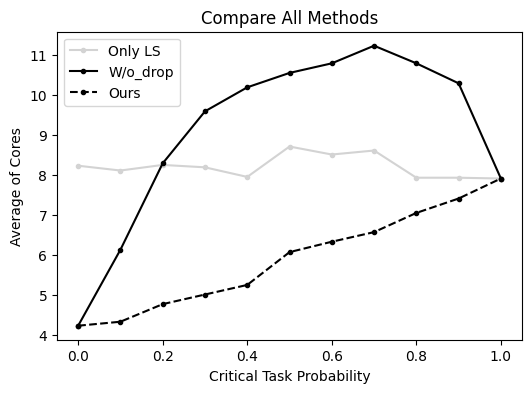

In [100]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, orig, label='Only LS', color='lightgray', marker='.')
plt.plot(criticality_prob_list, wo_drop, label='W/o_drop', color='black', marker='.')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed', marker='.')

plt.title('Compare All Methods')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of Cores')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend()
plt.show()